## P1: Metropolis-Hastings

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def target_density(x):
    return np.sin(x)**2 * np.exp(-np.abs(x))

def metropolis_hastings_algorithm(n_samples, sigma=1.0):
    eps = 1e-10 # For numerical stability
    # Initialize states, set initial state to zero
    x = np.zeros(n_samples+1)
    for i in range(n_samples):
        xs = np.random.normal(loc=x[i], scale=sigma)
        u = np.random.uniform(low=0.0, high=1.0)
        
        # Compute acceptance probability alpha
        alpha = ( target_density(xs) * norm.pdf(x[i], loc=xs, scale=sigma) 
                  / (target_density(x[i]) * norm.pdf(xs, loc=x[i], scale=sigma) + eps) )
        alpha = min(1.0, alpha)
        
        if u <= alpha:
            x[i+1] = xs
        else:
            x[i+1] = x[i]
    return x

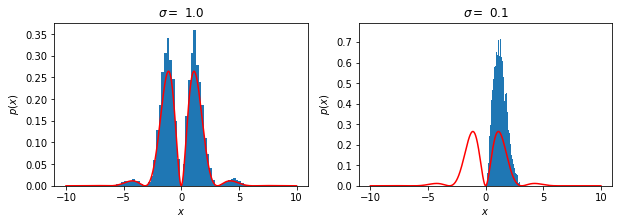

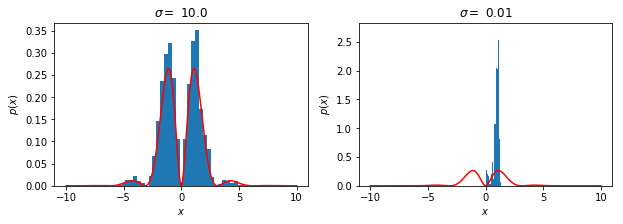

In [55]:
N = 10000
Sigma = [1.0, 0.1]
fig, axs = plt.subplots(1, 2, figsize=(10,3))
array = np.linspace(-10, 10, 1000)

for i, sigma in enumerate(Sigma):
    
    x = metropolis_hastings_algorithm(N, sigma)
    axs[i].hist(x, bins=50, density=True)
    axs[i].plot(array, target_density(array), '-r')
    axs[i].set_xlabel('$x$'); axs[i].set_ylabel('$p(x)$');
    axs[i].set_title("$\sigma =$ {}".format(sigma))

Sigma = [10.0, 0.01]
fig, axs = plt.subplots(1, 2, figsize=(10,3))

for i, sigma in enumerate(Sigma):
    
    x = metropolis_hastings_algorithm(N, sigma)
    axs[i].hist(x, bins=50, density=True)
    axs[i].plot(array, target_density(array), '-r')
    axs[i].set_xlabel('$x$'); axs[i].set_ylabel('$p(x)$');
    axs[i].set_title("$\sigma =$ {}".format(sigma))


## P2: Gibbs Sampling

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_sampler(n_samples, mu, cov, plot=False):
    # Initialize to x[0] = (0, 0)
    x = np.zeros([n_samples+1, 2])
    
    for i in range(n_samples):
        # Draw sample for x1
        cond_mean_x1 = mu[0] + cov[0, 1] * (x[i, 1] - mu[1]) / cov[1,1]
        cond_std_x1 = cov[0, 0] - (cov[0, 1]**2 / cov[1,1])
        x[i+1, 0] = np.random.normal(loc=cond_mean_x1, scale=cond_std_x1)
        
        # Draw sample for x2
        cond_mean_x2 = mu[1] + cov[0, 1] * (x[i+1, 0] - mu[0]) / cov[0,0]
        cond_std_x2 = cov[1, 1] - (cov[0, 1]**2 / cov[0, 0])
        x[i+1, 1] = np.random.normal(loc=cond_mean_x2, scale=cond_std_x2)
    return x

In [ ]:
# Code for plotting 2d Gaussian
x = np.linspace(0.0, 9.0, 1000); y = np.linspace(0.0, 6.0, 1000)
X, Y = np.meshgrid(x, y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Borrowed from: https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

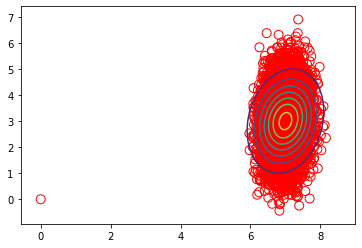

In [37]:
# Gaussian parameters
mu = np.array([7.0, 3.0])
cov = np.array([[0.3, 0.1], [0.1, 1.0]]) # Standard deviations!

Z = multivariate_gaussian(pos, mu, cov)
x = gibbs_sampler(10000, mu, cov)
plt.contour(X, Y, Z)
plt.scatter(x[:, 0], x[:, 1], s=80, facecolors='none', edgecolors='r')
plt.show()

## P3: Resampling